In [1]:
import pandas as pd


#Reading all CPI CSV Data
bread_csv = pd.read_csv("bread_clean.csv")
#print(bread_csv)

coffee_csv = pd.read_csv("coffee_clean.csv")
#print(coffee_csv)

eggs_csv = pd.read_csv("eggs_clean.csv")
#print(eggs_csv)

#Find aggregate CPI data, stored as a dataframe, units are percent increase
agg_cpi_df = pd.concat([bread_csv, coffee_csv, eggs_csv]).groupby(level=0).mean()
print(agg_cpi_df)

      Year       Jan       Feb       Mar        Apr       May        Jun  \
0   2010.0       NaN  0.915002 -2.244567  -0.197901 -4.683961   0.254174   
1   2011.0  2.781238 -3.381937  4.224444   3.317551  0.728083   0.912698   
2   2012.0  1.594445 -2.676211 -0.441340   1.504306 -2.340447  -0.709814   
3   2013.0 -1.660972 -0.609682  0.924091  -2.076525 -0.999963   0.179683   
4   2014.0 -0.258770  0.243087  0.374597   2.974705 -1.949347  -3.949789   
5   2015.0 -0.092658 -0.175970  0.271059   0.387021 -3.293311  10.215713   
6   2016.0 -5.106271 -1.672423 -2.836491  -4.674527 -2.482471  -4.717039   
7   2017.0  6.392908 -1.783594 -1.590643  -0.107090 -0.087110  -2.109153   
8   2018.0 -1.684662 -0.866581  3.196619   3.607979 -1.340273  -9.575096   
9   2019.0 -1.905421  0.410497 -1.236502  -1.671431 -3.296169  -6.186112   
10  2020.0 -0.905272  0.925301  2.382913  12.050986 -5.584190   0.096331   
11  2021.0  0.359374  3.379945  0.331603   0.125973 -1.179758   0.611371   
12  2022.0  

In [2]:
# Find inflation gap data
inflation_gap = agg_cpi_df - 2
inflation_gap["Year"] = inflation_gap["Year"] + 2
print(inflation_gap)

      Year       Jan       Feb       Mar        Apr       May        Jun  \
0   2010.0       NaN -1.084998 -4.244567  -2.197901 -6.683961  -1.745826   
1   2011.0  0.781238 -5.381937  2.224444   1.317551 -1.271917  -1.087302   
2   2012.0 -0.405555 -4.676211 -2.441340  -0.495694 -4.340447  -2.709814   
3   2013.0 -3.660972 -2.609682 -1.075909  -4.076525 -2.999963  -1.820317   
4   2014.0 -2.258770 -1.756913 -1.625403   0.974705 -3.949347  -5.949789   
5   2015.0 -2.092658 -2.175970 -1.728941  -1.612979 -5.293311   8.215713   
6   2016.0 -7.106271 -3.672423 -4.836491  -6.674527 -4.482471  -6.717039   
7   2017.0  4.392908 -3.783594 -3.590643  -2.107090 -2.087110  -4.109153   
8   2018.0 -3.684662 -2.866581  1.196619   1.607979 -3.340273 -11.575096   
9   2019.0 -3.905421 -1.589503 -3.236502  -3.671431 -5.296169  -8.186112   
10  2020.0 -2.905272 -1.074699  0.382913  10.050986 -7.584190  -1.903669   
11  2021.0 -1.640626  1.379945 -1.668397  -1.874027 -3.179758  -1.388629   
12  2022.0  

In [3]:
# dictionary for finding the month six months later
six_months_later = {
    "Jan": "Jul",
    "Feb": "Aug",
    "Mar": "Sep",
    "Apr": "Oct",
    "May": "Nov",
    "Jun": "Dec",
    "Jul": "Jan",
    "Aug": "Feb",
    "Sep": "Mar",
    "Oct": "Apr",
    "Nov": "May",
    "Dec": "Jun"
}

first_half_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun"]

#data frame for the difference between a time and its equivalent six months later
first_half_delta_gap_df = pd.DataFrame()

for i in range(len(first_half_months)):
    #find which two months I have to subtract
    month_one = first_half_months[i]
    month_two = six_months_later[month_one]

    #subtract and divide to get the final result
    first_half_delta_gap_df[month_one] = (inflation_gap[month_one] - inflation_gap[month_two]) / (inflation_gap[month_one] + 0.05)

second_half_delta_gap_df = pd.DataFrame()

second_half_months = ["Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

for i in range(len(second_half_months)):
    month_one = second_half_months[i]
    month_two = six_months_later[month_one]

    second_half_delta_gap_df[month_one] = (inflation_gap[month_one] - inflation_gap[month_two].shift(-1)) / (inflation_gap[month_one] + 0.05)

print(first_half_delta_gap_df)
print(second_half_delta_gap_df)

#value of S in repot
#delta_gap_df = 

#goal_alignment_df = 

         Jan       Feb        Mar       Apr       May       Jun
0        NaN  1.794706   2.323059 -2.298301  1.698973 -0.020399
1   1.186583  0.962882   0.098361  4.311266 -1.573346 -0.867050
2  -1.747597  1.471563   0.162109  3.118635  0.770410  0.407288
3  -0.021681 -0.396967  -0.370418  0.376342  0.299470  0.583584
4   1.659121  0.173490  -0.001036  4.149853  0.349175  1.199978
5   0.185057  2.124737  -0.412483 -1.866271 -0.009995  0.982196
6   0.898734 -0.367275   0.697224  0.409064  0.287914  0.913146
7   1.824883  0.924982   0.727377  1.159447 -0.736457  2.263614
8   1.433718 -0.628741   2.278399  2.269290 -0.214238  0.882571
9   0.935564 -1.045854   2.757524 -0.237813  1.445557  1.004859
10 -0.696121 -2.608418   4.499993  1.008833  0.872277  0.745813
11 -0.685300  0.949731   2.930644 -0.574368 -0.043398  1.086840
12 -0.369807 -1.676397  13.428886  0.014567  0.989947  3.332747
13  2.245527  0.473005   0.805590  0.766658  0.837827  1.538418
14  2.998907  1.267448   3.009008 -1.012

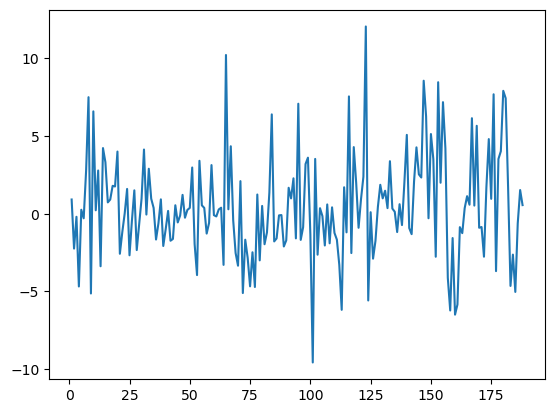

In [4]:
import matplotlib.pyplot as plt
import numpy as np

y = agg_cpi_df.iloc[:, 1:].to_numpy().flatten()

plt.plot(y)
#plt.savefig("aggregate_inflation_data", dpi=300, bbox_inches="tight")
plt.show()

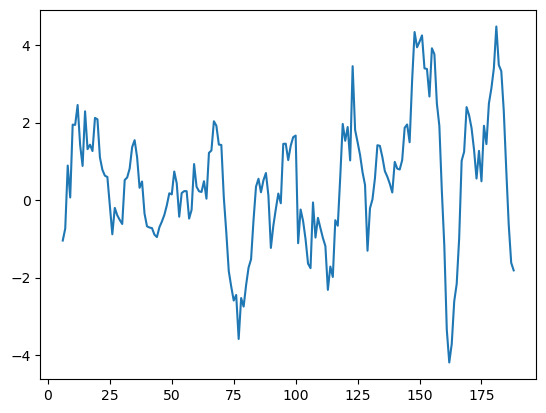

In [14]:
rolling_averaged_agg_cpi = pd.Series(y).rolling(window=6).mean()
plt.plot(rolling_averaged_agg_cpi)
plt.savefig("aggregate_inflation_data_6_month_roll", dpi=300, bbox_inches="tight")
plt.show()

In [6]:
# Some visualization here

# Fed Fund Rate data
fed_interest_rate = pd.read_csv("fed_fund_rate.csv")
# head() and tail() just for testing
'''
print(fed_interest_rate.head())
print(fed_interest_rate.tail())
'''
# Only looking at target scope
fed_interest_rate_df = fed_interest_rate[fed_interest_rate["Year"] >= 2010]
print(fed_interest_rate_df)

'''
plt.scatter(fed_interest_rate_df.iloc[:, 1:], agg_cpi_df.iloc[:, 1:])
plt.title("Aggregate Interest Rate v.s. Fed Fund Rate")
plt.xlabel("Fed Fund Rate")
plt.ylabel("Aggregate Interest Rate")
plt.savefig("Scatterplot_of_Inflation_Rate_vs_Interest_Rate", dpi=300, bbox_inches="tight")
plt.show()'''

    Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
50  2010  0.11  0.13  0.16  0.20  0.20  0.18  0.18  0.19  0.19  0.19  0.19   
51  2011  0.17  0.16  0.14  0.10  0.09  0.09  0.07  0.10  0.08  0.07  0.08   
52  2012  0.08  0.10  0.13  0.14  0.16  0.16  0.16  0.13  0.14  0.16  0.16   
53  2013  0.14  0.15  0.14  0.15  0.11  0.09  0.09  0.08  0.08  0.09  0.08   
54  2014  0.07  0.07  0.08  0.09  0.09  0.10  0.09  0.09  0.09  0.09  0.09   
55  2015  0.11  0.11  0.11  0.12  0.12  0.13  0.13  0.14  0.14  0.12  0.12   
56  2016  0.34  0.38  0.36  0.37  0.37  0.38  0.39  0.40  0.40  0.40  0.41   
57  2017  0.65  0.66  0.79  0.90  0.91  1.04  1.15  1.16  1.15  1.15  1.16   
58  2018  1.41  1.42  1.51  1.69  1.70  1.82  1.91  1.91  1.95  2.19  2.20   
59  2019  2.40  2.40  2.41  2.42  2.39  2.38  2.40  2.13  2.04  1.83  1.55   
60  2020  1.55  1.58  0.65  0.05  0.05  0.08  0.09  0.10  0.09  0.09  0.09   
61  2021  0.09  0.08  0.07  0.07  0.06  0.08  0.10  0.09  0.08  

'\nplt.scatter(fed_interest_rate_df.iloc[:, 1:], agg_cpi_df.iloc[:, 1:])\nplt.title("Aggregate Interest Rate v.s. Fed Fund Rate")\nplt.xlabel("Fed Fund Rate")\nplt.ylabel("Aggregate Interest Rate")\nplt.savefig("Scatterplot_of_Inflation_Rate_vs_Interest_Rate", dpi=300, bbox_inches="tight")\nplt.show()'

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
187   -1.616213
188   -1.811486
189         NaN
190         NaN
191         NaN
Length: 192, dtype: float64
[0.16 0.2  0.2  0.18 0.18 0.19 0.19 0.19 0.19 0.18 0.17 0.16 0.14 0.1
 0.09 0.09 0.07 0.1  0.08 0.07 0.08 0.07 0.08 0.1  0.13 0.14 0.16 0.16
 0.16 0.13 0.14 0.16 0.16 0.16 0.14 0.15 0.14 0.15 0.11 0.09 0.09 0.08
 0.08 0.09 0.08 0.09 0.07 0.07 0.08 0.09 0.09 0.1  0.09 0.09 0.09 0.09
 0.09 0.12 0.11 0.11 0.11 0.12 0.12 0.13 0.13 0.14 0.14 0.12 0.12 0.24
 0.34 0.38 0.36 0.37 0.37 0.38 0.39 0.4  0.4  0.4  0.41 0.54 0.65 0.66
 0.79 0.9  0.91 1.04 1.15 1.16 1.15 1.15 1.16 1.3  1.41 1.42 1.51 1.69
 1.7  1.82 1.91 1.91 1.95 2.19 2.2  2.27 2.4  2.4  2.41 2.42 2.39 2.38
 2.4  2.13 2.04 1.83 1.55 1.55 1.55 1.58 0.65 0.05 0.05 0.08 0.09 0.1
 0.09 0.09 0.09 0.09 0.09 0.08 0.07 0.07 0.06 0.08 0.1  0.09 0.08 0.08
 0.08 0.08 0.08 0.08 0.2  0.33 0.77 1.21 1.68 2.33 2.56 3.08 3.78 4.1
 4.33 4.57 4.65 4.

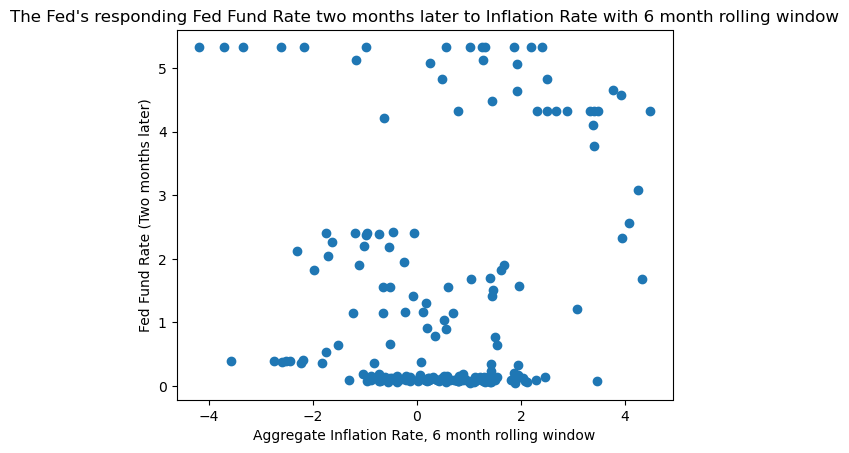

In [21]:
# AI Assisted Code
y_vals = fed_interest_rate_df.iloc[:, 1:].to_numpy().ravel()
x_vals = agg_cpi_df.iloc[:, 1:].to_numpy().ravel()

# Shift X by two, so that we assume the Fed responds to the previous months' inflation rate.
y_shifted = np.roll(y_vals, -2)   # shift left by 2

# Last two values should be NaN, roll() moves the first two values to the end.
y_shifted[-2:] = np.nan


print(rolling_averaged_agg_cpi)
print(y_shifted)

plt.scatter(rolling_averaged_agg_cpi, y_shifted[not_zero])
plt.title("The Fed's responding Fed Fund Rate two months later to Inflation Rate with 6 month rolling window")
plt.xlabel("Aggregate Inflation Rate, 6 month rolling window")
plt.ylabel("Fed Fund Rate (Two months later)")
#plt.savefig("Fed_Fund_Rate_as_response_to_Inflation_3_month_rolling", dpi=300, bbox_inches="tight")
plt.show()

In [22]:
print(np.where(y_shifted == 5.33))

(array([161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173]),)
